# Generating Embeddings

- In this Notebook, we'll generate Embeddings for Fashion Items that were scraped from the Myntra Website.
- We'll use the trained Embedding Models for different ategories like, Topwear, Bottomwear and Footwear for this purpose.

In [35]:
import os
import numpy as np
import random
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import resnet
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

In [2]:
TARGET_SHAPE = (224,224,3)
def preprocess_image(filename: str):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    
    Args:
        filename: Absolute / Relative file path for the image
    
    Returns:
        Preprocessed inputs of type tensorflow.Tensor for Embedding Generation 
    """
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, TARGET_SHAPE[:2])
    image = resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0)


def generate_embedding(dataframe, embedding_generator):
    """
    Use the specified dataframe and Embeddings model to 
    calculate embeddings for all records in the dataframe
    
    Args:
        dataframe: Dataframe to get records for Embedding Generation
        embedding_genrator: Tensorflow Model to generate embeddings
    
    Returns:
        Dataframe with embeddings for each record.
    """
    embeddings = list()
    for i, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0]):
        filename = row["image_path"]
        image = preprocess_image(filename)
        embedding = embedding_generator(image)
        embeddings.append(embedding[0].numpy().astype(np.float32).tolist())
    dataframe["embedding"] = embeddings
    return dataframe

In [3]:
df = pd.read_csv("CSVS\\myntra-fashion-products.csv")
print(df.shape)
df.head()

(10310, 9)


product_id                                        product_url  \
0  mtf_0000000001  https://www.myntra.com/shirts/jainish/jainish-...   
1  mtf_0000000002  https://www.myntra.com/shirts/english-navy/eng...   
2  mtf_0000000003  https://www.myntra.com/shirts/ivoc/ivoc-men-bl...   
3  mtf_0000000004  https://www.myntra.com/shirts/jainish/jainish-...   
4  mtf_0000000005  https://www.myntra.com/shirts/invictus/invictu...   

                                           image_url  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...   

                                         description         brand gender  \
0  JAINISH Men Grey Classic Regular Fit Solid For...       Jainish    men   
1  English Navy Men Black Slim Fit Solid Formal S...  English-Navy    men   
2   IVOC Men Black Slim Fit Solid Smart Formal Shirt          Ivoc    men   
3  JAINISH Men Grey Classic Slim Fit Printed Form...       Jainish    men   
4  INVICTUS Men Navy Blue & White Slim Fit Pure C...      Invictus    men   

  category    type                                       image_path  
0  topwear  formal  database\mens_formal_topwear\mtf_0000000001.jpg  
1  topwear  formal  database\mens_formal_topwear\mtf_0000000002.jpg  
2  topwear  formal  database\mens_formal_topwear\mtf_0000000003.jpg  
3  topwear  formal  database\mens_formal_topwear\mtf_0000000004.jpg  
4  topwear  formal  database\mens_formal_topwear\mtf_0000000005.jpg

In [4]:
mens_topwear = df[(df["gender"] == "men") & (df["category"] == "topwear")]
mens_bottomwear = df[(df["gender"] == "men") & (df["category"] == "bottomwear")]
mens_footwear = df[(df["gender"] == "men") & (df["category"] == "footwear")]
womens_topwear = df[(df["gender"] == "women") & (df["category"] == "topwear")]
womens_bottomwear = df[(df["gender"] == "women") & (df["category"] == "bottomwear")]
womens_footwear = df[(df["gender"] == "women") & (df["category"] == "footwear")]

In [5]:
topwear_embedding = load_model("MODELS\\topwear_embedding.h5")
bottomwear_embedding = load_model("MODELS\\bottomwear_embedding.h5")
footwear_embedding = load_model("MODELS\\footwear_embedding.h5")

In [6]:
womens_topwear = generate_embedding(womens_topwear, topwear_embedding)
womens_topwear.to_csv("CSVS\\womens_topwear_embeddings.csv", index=False)
womens_topwear = pd.read_csv("CSVS\\womens_topwear_embeddings.csv")

100%|██████████████████████████████████████████████████████████████████████████████| 1628/1628 [09:53<00:00,  2.74it/s]
C:\Users\CHIRAG\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
womens_bottomwear = generate_embedding(womens_bottomwear, bottomwear_embedding)
womens_bottomwear.to_csv("CSVS\\womens_bottomwear_embeddings.csv", index=False)
womens_bottomwear = pd.read_csv("CSVS\\womens_bottomwear_embeddings.csv")

100%|██████████████████████████████████████████████████████████████████████████████| 1206/1206 [06:29<00:00,  3.10it/s]
C:\Users\CHIRAG\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
womens_footwear = generate_embedding(womens_footwear, footwear_embedding)
womens_footwear.to_csv("CSVS\\womens_footwear_embeddings.csv", index=False)
womens_footwear = pd.read_csv("CSVS\\womens_footwear_embeddings.csv")

100%|██████████████████████████████████████████████████████████████████████████████| 1484/1484 [07:40<00:00,  3.22it/s]
C:\Users\CHIRAG\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
mens_topwear = generate_embedding(mens_topwear, topwear_embedding)
mens_topwear.to_csv("CSVS\\mens_topwear_embeddings.csv", index=False)
mens_topwear = pd.read_csv("CSVS\\mens_topwear_embeddings.csv")

100%|██████████████████████████████████████████████████████████████████████████████| 2142/2142 [12:35<00:00,  2.84it/s]
C:\Users\CHIRAG\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
mens_bottomwear = generate_embedding(mens_bottomwear, bottomwear_embedding)
mens_bottomwear.to_csv("CSVS\\mens_bottomwear_embeddings.csv", index=False)
mens_bottomwear = pd.read_csv("CSVS\\mens_bottomwear_embeddings.csv")

100%|██████████████████████████████████████████████████████████████████████████████| 1810/1810 [09:04<00:00,  3.32it/s]
C:\Users\CHIRAG\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
mens_footwear = generate_embedding(mens_footwear, footwear_embedding)
mens_footwear.to_csv("CSVS\\mens_footwear_embeddings.csv", index=False)
mens_footwear = pd.read_csv("CSVS\\mens_footwear_embeddings.csv")

100%|██████████████████████████████████████████████████████████████████████████████| 2040/2040 [10:05<00:00,  3.37it/s]
C:\Users\CHIRAG\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


100%|█████████████████████████████████████████████████████████████████████████████| 1628/1628 [00:03<00:00, 522.53it/s]


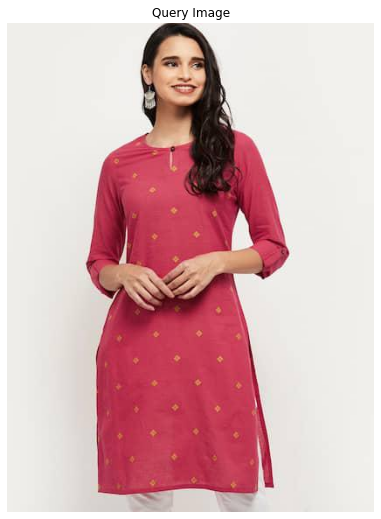

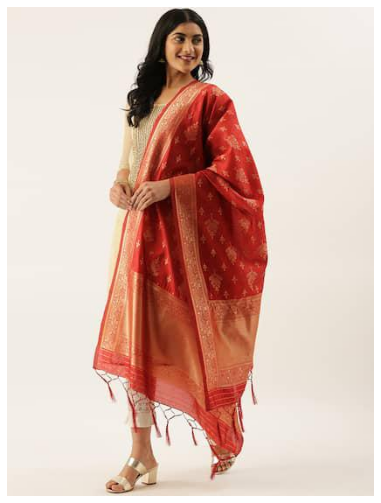

Shop Now @  https://www.myntra.com/dupatta/ladusaa/ladusaa-red--gold-toned-woven-design-banarasi-dupatta/13530156/buy


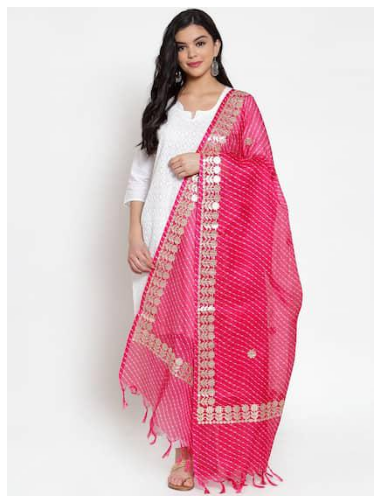

Shop Now @  https://www.myntra.com/dupatta/soundarya/soundarya-magenta-gota-patti-embroidered-dupatta/12382120/buy


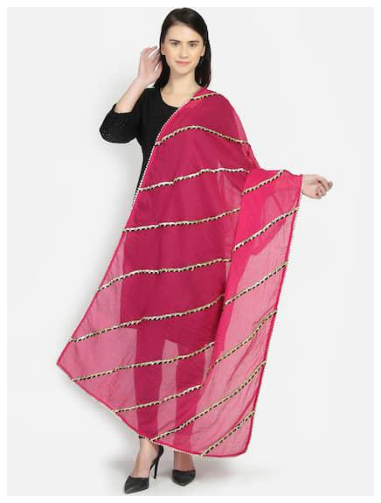

Shop Now @  https://www.myntra.com/dupatta/amraoo/amraoo-pink--gold-toned-embroidered-dupatta/11406882/buy


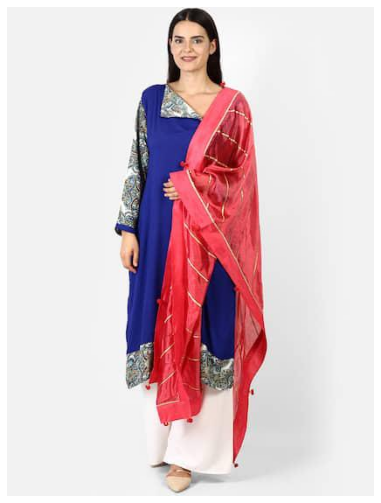

Shop Now @  https://www.myntra.com/dupatta/amraoo/amraoo-peach-coloured-striped-dupatta/11316688/buy


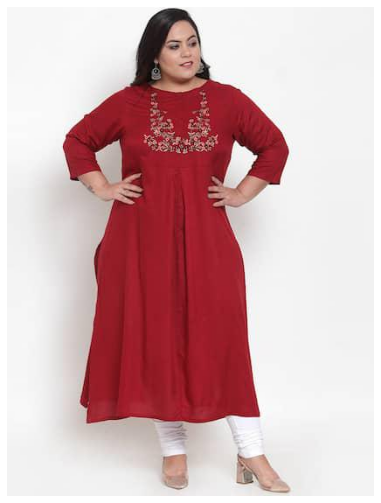

Shop Now @  https://www.myntra.com/kurtas/pluss/pluss-women-maroon-floral-embroidered-a-line-kurta/11181480/buy


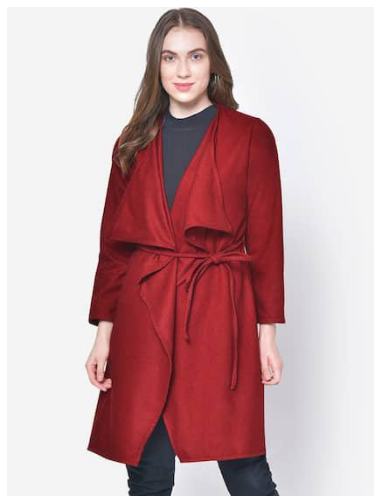

Shop Now @  https://www.myntra.com/coats/martini/martini-women-red-solid-woolen-wrap-coat/13154376/buy


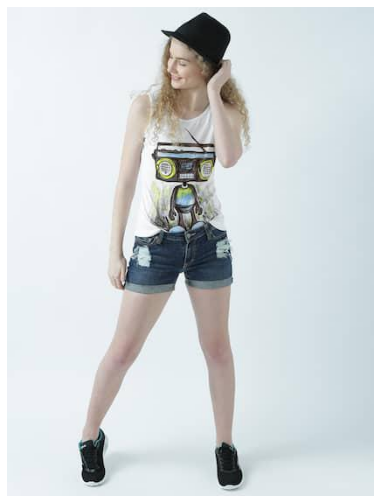

Shop Now @  https://www.myntra.com/tops/huetrap/huetrap-women-white-printed-tank-top/2333447/buy


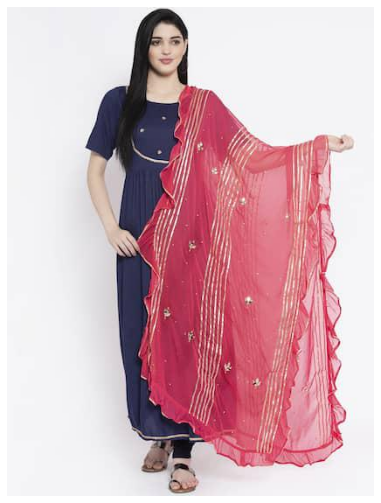

Shop Now @  https://www.myntra.com/dupatta/studio-rasa/studio-rasa-coral-pink--gold-coloured-striped-dupatta/12253874/buy


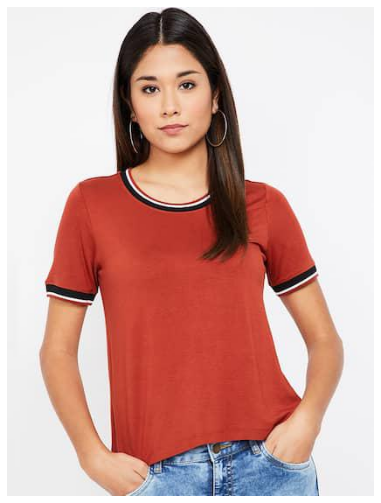

Shop Now @  https://www.myntra.com/tops/bossini/bossini-women-rust-red-solid-top/11596494/buy


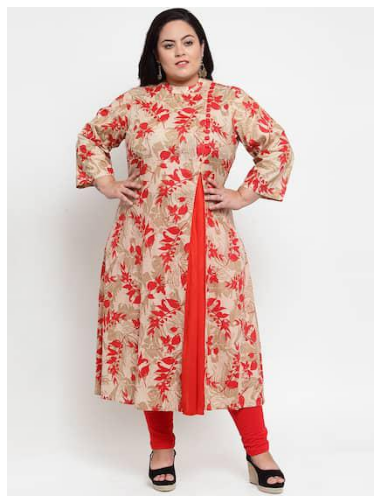

Shop Now @  https://www.myntra.com/kurtas/pluss/pluss-women-beige--red-floral-printed-a-line-kurta/10414480/buy


In [41]:
tqdm.pandas()
query_embedding = womens_topwear.iloc[random.randint(0,womens_topwear.shape[0])].embedding
womens_topwear['distance'] = womens_topwear['embedding'].progress_apply(lambda x: np.linalg.norm(np.asarray(eval(x), dtype=np.float32) - np.asarray(eval(query_embedding), dtype=np.float32)))
womens_topwear = womens_topwear.sort_values(by='distance').reset_index(drop=True)
plt.figure(figsize=(16,9))
plt.imshow(io.imread(womens_topwear.iloc[0].image_path))
plt.title("Query Image")
plt.axis("off");plt.show()
print(254*"=")
print(254*"=")
for i, row in womens_topwear.iloc[1:11].iterrows():
    plt.figure(figsize=(16,9))
    image = io.imread(row["image_path"])
    plt.imshow(image);plt.axis("off")
    plt.show()
    print("Shop Now @ ", row["product_url"])
    print(254*"=")

100%|█████████████████████████████████████████████████████████████████████████████| 2142/2142 [00:02<00:00, 827.56it/s]


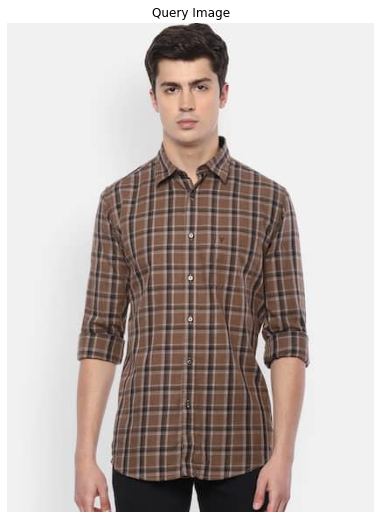

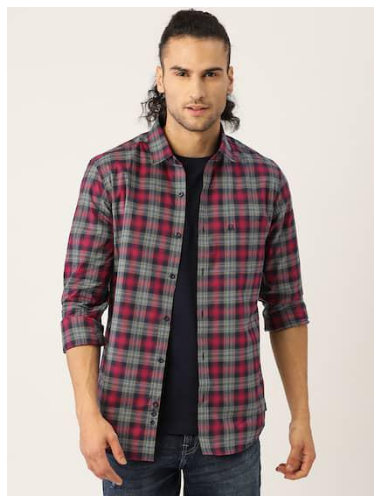

Shop Now @  https://www.myntra.com/shirts/united-colors-of-benetton/united-colors-of-benetton-men-pink--navy-blue-slim-fit-checked-casual-shirt/13450398/buy


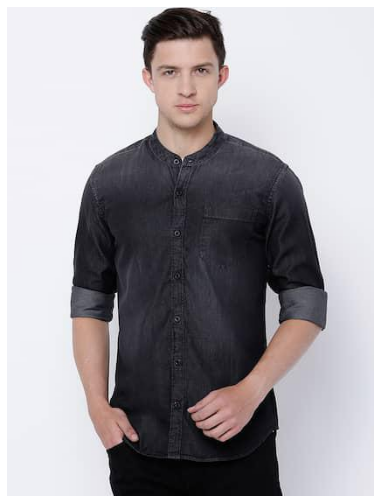

Shop Now @  https://www.myntra.com/shirts/highlander/highlander-men-black-slim-fit-denim-casual-shirt/1847851/buy


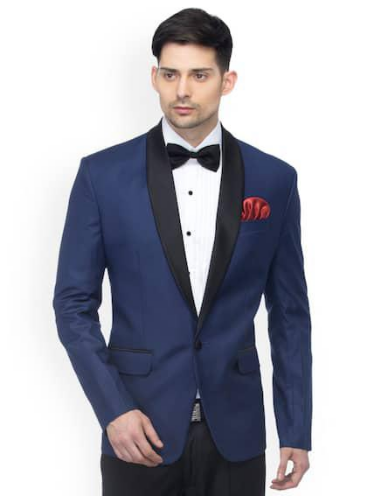

Shop Now @  https://www.myntra.com/blazers/favoroski/favoroski-navy-blue-slim-fit-single-breasted-tuxedo-blazer/2379223/buy


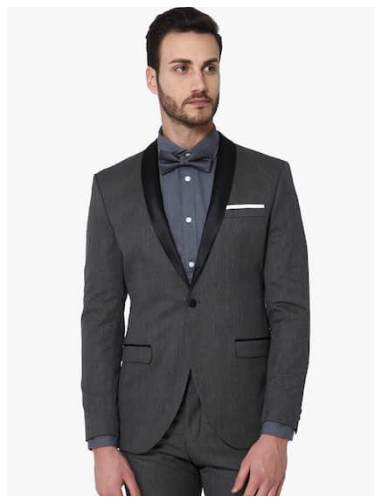

Shop Now @  https://www.myntra.com/blazers/selected/selected-identity-men-black-self-design-single-breasted-tuxedo/7104574/buy


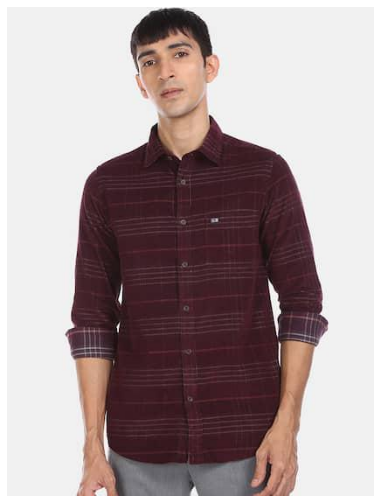

Shop Now @  https://www.myntra.com/shirts/arrow-sport/arrow-sport-men-red-regular-fit-striped-casual-shirt/13649484/buy


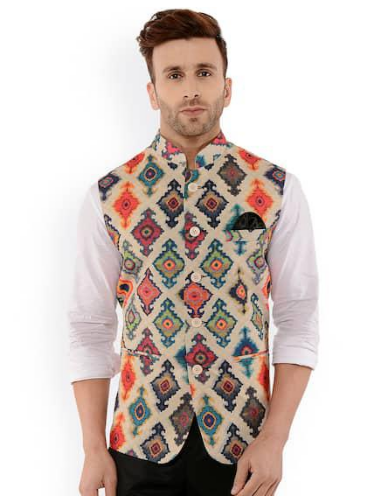

Shop Now @  https://www.myntra.com/nehru-jackets/hangup/hangup-men-beige-printed-nehru-jacket/2458630/buy


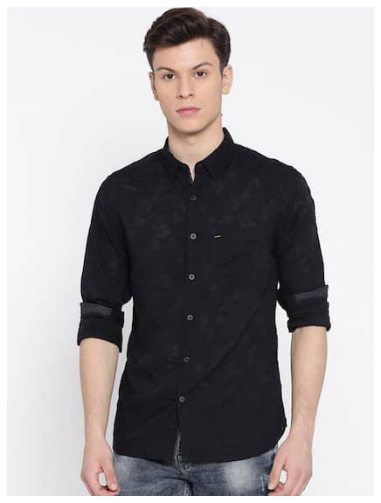

Shop Now @  https://www.myntra.com/shirts/spykar/spykar-men-black--navy-blue-slim-fit-burnout-effect-casual-shirt/5827523/buy


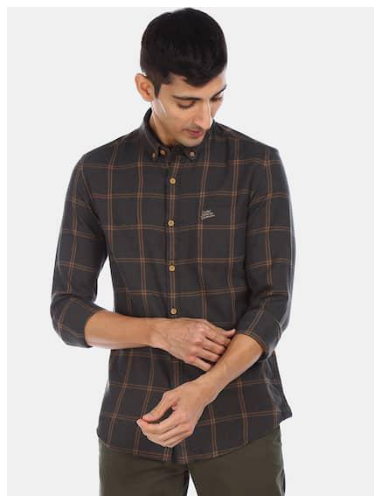

Shop Now @  https://www.myntra.com/shirts/us-polo-assn/us-polo-assn-men-charcoal-grey-regular-fit-checked-cotton-casual-shirt/13692176/buy


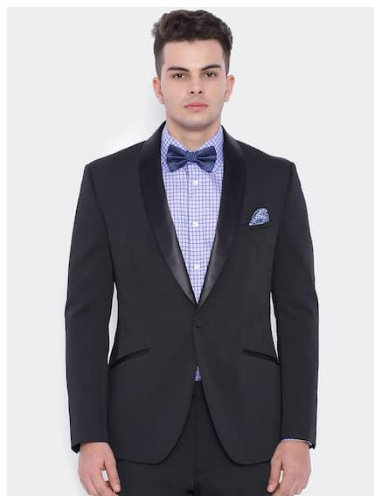

Shop Now @  https://www.myntra.com/blazers/suitltd/suitltd-black-slim-fit-single-breasted-tuxedo-blazer/1747268/buy


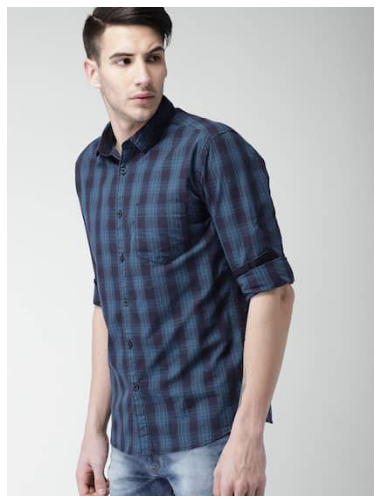

Shop Now @  https://www.myntra.com/shirts/highlander/highlander-men-blue-slim-fit-checked-casual-shirt/2203764/buy


In [26]:
tqdm.pandas()
query_embedding = mens_topwear.iloc[random.randint(0,mens_topwear.shape[0])].embedding
mens_topwear['distance'] = mens_topwear['embedding'].progress_apply(lambda x: np.linalg.norm(np.asarray(eval(x), dtype=np.float32) - np.asarray(eval(query_embedding), dtype=np.float32)))
mens_topwear = mens_topwear.sort_values(by='distance').reset_index(drop=True)
plt.figure(figsize=(16,9))
plt.imshow(io.imread(mens_topwear.iloc[0].image_path))
plt.title("Query Image")
plt.axis("off");plt.show()
print(254*"=")
print(254*"=")
for i, row in mens_topwear.iloc[1:11].iterrows():
    plt.figure(figsize=(16,9))
    image = io.imread(row["image_path"])
    plt.imshow(image);plt.axis("off")
    plt.show()
    print("Shop Now @ ", row["product_url"])
    print(254*"=")